<a href="https://colab.research.google.com/github/d-h-k/w12_tf_ws/blob/master/Copy_NamwooGOD_of_w12d02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cost and Gradient 57p

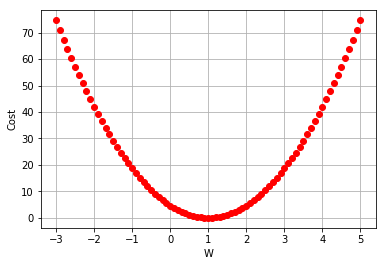

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

X = [1., 2., 3.]
Y = [1., 2., 3.]
m = len(X)
6
W = tf.placeholder(tf.float32)

hypothesis = tf.multiply(W, X)
# cf. ) tf.mul(W, X) using in the old version
cost = tf.reduce_sum(tf.pow(hypothesis-Y, 2)) / m

init = tf.global_variables_initializer()
#cf.)tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)

W_val, cost_val = [], []

for i in range(-30, 51) :
  xPos = i * 0.1
  yPos = sess.run(cost ,feed_dict={W: xPos})
#   print('{:3.1f}, {:3.1f}'.format(xPos, yPos))  # : 앞 형식문자. 

  W_val.append(xPos)
  cost_val.append(yPos)
sess. close()

# plt.xlim()
plt.plot(W_val, cost_val, 'ro')
plt.ylabel('Cost')
plt.xlabel('W')
plt.grid()
plt.show()

# Linear Regression 59p

In [0]:
import tensorflow as tf

x_data = [1., 2., 3.]
y_data = [1., 2., 3.]

# try to find values for wand b that compute y_data W * x_data + b
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.random_uniform([1], -1.0, 1.0))

# my hypothesis
hypothesis = W * x_data + b

# Simplified cost function
cost = tf.reduce_mean(tf.square(hypothesis - y_data))

# minimize
rate = tf.Variable(0.1) # learning rate, alpha
optimizer = tf.train.GradientDescentOptimizer(rate)
train = optimizer.minimize(cost)

# before starting, initialize the variables. We will 'run' this first.
init = tf.global_variables_initializer()
#cf.)tf.initialize_all_variables()

# launch the graph
sess = tf.Session()
sess.run(init)

# fit the line
for step in range(2001):
  sess.run( train )
  if step% 20 == 0:
    print('{:4} {} {} {}'.format (step, sess.run(cost), sess.run(W), sess.run(b)))

    # learns best fit is W: [1] b: [0]

   0 0.1918504685163498 [0.79173803] [0.82017606]
  20 0.031633567065000534 [0.79342866] [0.46958515]
  40 0.01195200253278017 [0.8730255] [0.28864282]
  60 0.004515789914876223 [0.92195183] [0.17742191]
  80 0.0017061849357560277 [0.95202553] [0.10905708]
 100 0.0006446472834795713 [0.9705113] [0.06703483]
 120 0.00024356378708034754 [0.981874] [0.04120471]
 140 9.202522778650746e-05 [0.9888584] [0.02532757]
 160 3.476988786133006e-05 [0.9931515] [0.01556828]
 180 1.3137199857737869e-05 [0.9957904] [0.00956949]
 200 4.963432274962543e-06 [0.99741244] [0.00588215]
 220 1.875302928056044e-06 [0.99840945] [0.00361561]
 240 7.08527466031228e-07 [0.9990223] [0.00222247]
 260 2.676803774193104e-07 [0.999399] [0.00136611]
 280 1.0113507187270443e-07 [0.9996306] [0.00083969]
 300 3.823677374725776e-08 [0.9997729] [0.00051614]
 320 1.4438138684624846e-08 [0.9998604] [0.00031728]
 340 5.457195584313013e-09 [0.99991417] [0.000195]
 360 2.0570354308802052e-09 [0.9999473] [0.00011986]
 380 7.78735

# Test of Linear Regression 60p

In [0]:
import tensorflow as tf

x_data = [1., 2., 3., 4.]
y_data = [2., 4., 6., 8.]
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

with tf.name_scope("Logit_Layer"):
# range is -100 ~ 100
  W = tf.Variable(tf.random_uniform ([1], -100., 100.))
  b = tf.Variable(tf.random_uniform([1], -100., 100.))
  hypothesis = W * X + b
  
with tf.name_scope("GD_Trainer"):
  cost = tf.reduce_mean(tf.square(hypothesis - Y))
  rate = tf.Variable(0.1)
  optimizer = tf.train.GradientDescentOptimizer(rate)
  train = optimizer.minimize(cost)

init = tf.global_variables_initializer()
#cf.)tf.initialize_all_variables() using in the old version

sess = tf.Session()
sess.run(init)
writer = tf.summary.FileWriter('/content/log',graph=tf.get_default_graph())


#여기서부터 train
for step in range(700):
  sess.run(train, feed_dict={X: x_data, Y: y_data})
  if step% 5 == 0:
    print('step:',step ,sess.run(cost, feed_dict={X: x_data, Y: y_data}), 'W:',sess.run(W), 'b:',sess.run(b))

#여기서부터 test
#관측되지 않은 데이터 넣어보기 5, 2.5
print(sess.run(hypothesis, feed_dict={X : 5}))    
print(sess.run(hypothesis, feed_dict={X : 2.5}))
print(sess.run(hypothesis, feed_dict={X: [2.5, 5]}))

step: 0 5838.243 W: [-38.441177] b: [39.508446]
step: 5 380.44974 W: [-8.678916] b: [42.12132]
step: 10 209.07169 W: [-10.423141] b: [35.077015]
step: 15 152.96408 W: [-8.232549] b: [30.280603]
step: 20 112.84649 W: [-6.849095] b: [25.99099]
step: 25 83.26761 W: [-5.5933986] b: [22.329088]
step: 30 61.44214 W: [-4.5238414] b: [19.180407]
step: 35 45.337395 W: [-3.6038587] b: [16.476093]
step: 40 33.45391 W: [-2.8137567] b: [14.153023]
step: 45 24.685234 W: [-2.1350336] b: [12.157503]
step: 50 18.214931 W: [-1.5520099] b: [10.443342]
step: 55 13.440577 W: [-1.0511905] b: [8.970873]
step: 60 9.917636 W: [-0.6209849] b: [7.706015]
step: 65 7.318102 W: [-0.25143626] b: [6.619497]
step: 70 5.399938 W: [0.0660074] b: [5.686174]
step: 75 3.9845486 W: [0.33869267] b: [4.884446]
step: 80 2.9401498 W: [0.5729306] b: [4.1957583]
step: 85 2.1694999 W: [0.77414167] b: [3.604173]
step: 90 1.6008477 W: [0.94698286] b: [3.0959988]
step: 95 1.1812459 W: [1.0954542] b: [2.659475]
step: 100 0.871627 W: [

## Gradient Descent 응용 실습

In [0]:
import tensorflow as tf

x_data = [1., 2., 3., 4.]
y_data = [2., 4., 6., 8.]
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

with tf.name_scope("Logit_Layer"):
# range is -100 ~ 100
  W = tf.Variable(tf.random_uniform ([1], -100., 100.))
  W2 = tf.Variable(tf.random_uniform ([1], -100., 100.))

  #b = tf.Variable(tf.random_uniform([1], -100., 100.))
  hypothesis = W * X # + b
  
with tf.name_scope("GD_Trainer"):
  cost = tf.reduce_mean(tf.square(hypothesis - Y))  #cost
  rate = tf.Variable(0.1)
  gradient = tf.reduce_mean((W * X - Y) * X)    #gradient 실습하기 위해 추가
  descent = W - rate * gradient   #alpha 는 Learning rate~  # descent 
  update = tf.assign(W2, descent)
  optimizer = tf.train.GradientDescentOptimizer(rate)
  train = optimizer.minimize(cost)

init = tf.global_variables_initializer()
#cf.)tf.initialize_all_variables() using in the old version

sess = tf.Session()
sess.run(init)
writer = tf.summary.FileWriter('/content/log',graph=tf.get_default_graph())

#여기서부터 train
for step in range(200):
  sess.run(train, feed_dict={X: x_data, Y: y_data})
  if step% 5 == 0:
    print('step:',step ,sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(update, feed_dict={X: x_data, Y: y_data}),'W:',sess.run(W), 'W2:',sess.run(W2))

#여기서부터 test
#관측되지 않은 데이터 넣어보기 5, 2.5
print(sess.run(hypothesis, feed_dict={X : 5}))    
print(sess.run(hypothesis, feed_dict={X : 2.5}))
print(sess.run(hypothesis, feed_dict={X: [2.5, 5]}))

step: 0 487.69998 [4.015978] W: [10.063911] W2: [4.015978]
step: 5 0.4762696 [1.9370008] W: [1.7480028] W2: [1.9370008]
step: 10 0.00046511312 [2.0019689] W: [2.007875] W2: [2.0019689]
step: 15 4.5404704e-07 [1.9999385] W: [1.999754] W2: [1.9999385]
step: 20 4.3655746e-10 [2.000002] W: [2.0000076] W2: [2.000002]
step: 25 5.258016e-13 [2.] W: [1.9999998] W2: [2.]
step: 30 0.0 [2.] W: [2.] W2: [2.]
step: 35 0.0 [2.] W: [2.] W2: [2.]
step: 40 0.0 [2.] W: [2.] W2: [2.]
step: 45 0.0 [2.] W: [2.] W2: [2.]
step: 50 0.0 [2.] W: [2.] W2: [2.]
step: 55 0.0 [2.] W: [2.] W2: [2.]
step: 60 0.0 [2.] W: [2.] W2: [2.]
step: 65 0.0 [2.] W: [2.] W2: [2.]
step: 70 0.0 [2.] W: [2.] W2: [2.]
step: 75 0.0 [2.] W: [2.] W2: [2.]
step: 80 0.0 [2.] W: [2.] W2: [2.]
step: 85 0.0 [2.] W: [2.] W2: [2.]
step: 90 0.0 [2.] W: [2.] W2: [2.]
step: 95 0.0 [2.] W: [2.] W2: [2.]
step: 100 0.0 [2.] W: [2.] W2: [2.]
step: 105 0.0 [2.] W: [2.] W2: [2.]
step: 110 0.0 [2.] W: [2.] W2: [2.]
step: 115 0.0 [2.] W: [2.] W2: [2.]
s

## 이어서2

In [0]:
import tensorflow as tf

x_data = [1., 2., 3., 4.]
y_data = [2., 4., 6., 8.]
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
# W2 = tf.placeholder(tf.float32)


with tf.name_scope("Logit_Layer"):
# range is -100 ~ 100
#   W = tf.Variable(tf.random_uniform ([1], -100., 100.))
  W2 = tf.Variable(tf.random_uniform ([1], -100., 100.))
  #b = tf.Variable(tf.random_uniform([1], -100., 100.))
  hypothesis = W2 * X # + b
  
with tf.name_scope("GD_Trainer"):
  cost = tf.reduce_mean(tf.square(hypothesis - Y))  #cost
  rate = tf.Variable(0.1)
  gradient = tf.reduce_mean((W2 * X - Y) * X)    #gradient 실습하기 위해 추가
  descent = W2 - rate * gradient   #alpha 는 Learning rate~  # descent 
  update = tf.assign(W2, descent)
#   optimizer = tf.train.GradientDescentOptimizer(rate)
#   train = optimizer.minimize(cost)

init = tf.global_variables_initializer()
#cf.)tf.initialize_all_variables() using in the old version

sess = tf.Session()
sess.run(init)
writer = tf.summary.FileWriter('/content/log',graph=tf.get_default_graph())

#여기서부터 train
for step in range(200):
#   sess.run(train, feed_dict={X: x_data, Y: y_data})
  if step% 5 == 0:
    print('step:', step, sess.run(update, feed_dict={X: x_data, Y: y_data}),'W2:',sess.run(W2))

#여기서부터 test
#관측되지 않은 데이터 넣어보기 5, 2.5
print(sess.run(hypothesis, feed_dict={X : 5}))    
print(sess.run(hypothesis, feed_dict={X : 2.5}))
print(sess.run(hypothesis, feed_dict={X: [2.5, 5]}))

step: 0 [8.9156] W2: [8.9156]
step: 5 [3.7289] W2: [3.7289]
step: 10 [2.432225] W2: [2.432225]
step: 15 [2.1080563] W2: [2.1080563]
step: 20 [2.027014] W2: [2.027014]
step: 25 [2.0067534] W2: [2.0067534]
step: 30 [2.0016885] W2: [2.0016885]
step: 35 [2.000422] W2: [2.000422]
step: 40 [2.0001054] W2: [2.0001054]
step: 45 [2.0000262] W2: [2.0000262]
step: 50 [2.0000067] W2: [2.0000067]
step: 55 [2.0000017] W2: [2.0000017]
step: 60 [2.0000005] W2: [2.0000005]
step: 65 [2.] W2: [2.]
step: 70 [2.] W2: [2.]
step: 75 [2.] W2: [2.]
step: 80 [2.] W2: [2.]
step: 85 [2.] W2: [2.]
step: 90 [2.] W2: [2.]
step: 95 [2.] W2: [2.]
step: 100 [2.] W2: [2.]
step: 105 [2.] W2: [2.]
step: 110 [2.] W2: [2.]
step: 115 [2.] W2: [2.]
step: 120 [2.] W2: [2.]
step: 125 [2.] W2: [2.]
step: 130 [2.] W2: [2.]
step: 135 [2.] W2: [2.]
step: 140 [2.] W2: [2.]
step: 145 [2.] W2: [2.]
step: 150 [2.] W2: [2.]
step: 155 [2.] W2: [2.]
step: 160 [2.] W2: [2.]
step: 165 [2.] W2: [2.]
step: 170 [2.] W2: [2.]
step: 175 [2.] W2:

# Logistic Regression 62p